# DQN Dyad Experiments

In [54]:
import gym
import sys, time
import numpy as np; 
from numpy import asarray as narr
import matplotlib.pyplot as plt
from collections import namedtuple
from copy import deepcopy
import torch
from torch import nn, optim
import pickle
from matplotlib import cm

In [55]:
# Import custom scripts

sys.path.append('configs/')
sys.path.append('agents/')
sys.path.append('util/')
import env_old
from util import buffers, nn_models, torch_trainer
from agents import rl_agent, train_agents, benchmark_agents

In [162]:
# import importlib
# importlib.reload(buffers)

<module 'util.buffers' from '/nfs/nfs7/home/sheybani/GitRepos/B659-RL-Project/util/buffers.py'>

In [8]:


# Contents of the above line:

# BMHyperparams = namedtuple('BMHyperparams',
#                 ('batch_size','learning_rate', 'buffer_max_size',
#                  'experience_sift_tol', 'target_int'))
# #Benchmark x-axis related
# n_episodes = 50 #recommended: 150
# n_intervals = 5 # recommended: 15
# n_eval = 10

# # Buffer-related
# experience_sift_tol = 0.01
# buffer_max_size = 500

# # Algo hyperparams
# learning_rate=0.005
# batch_size=128
# xaxis_params = (n_episodes, n_intervals, n_eval)
# hyperparams = BMHyperparams(batch_size, learning_rate, 
#                 buffer_max_size, experience_sift_tol, target_int)


# #------- Create the agents
# buffer1 = buffers.ReplayMemory(buffer_max_size, tag=experience_sift_tol)
# buffer2 = deepcopy(buffer1)

#     #------- Create the NN models
# # Input:
# # r, r', x, x', fn, fndot, f
# # Output: q
# qnet = nn_models.NetRelu1L1(7, 1)
# optimizer = optim.Adam(qnet.parameters(), lr=learning_rate)
# criterion = nn.MSELoss()
# rl1 = torch_trainer.DQNTrainer(qnet, optimizer, criterion)
# rl2 = deepcopy(rl1)

# pdcont1 = [0.1, .2]#[0., 0]#[0.3, 1.]#[0.0364, 1.]#[0.01, 0.03]
# pdcont2 = [0.2, 0.1]#[0., 0]#[0.3, 1.]#[0.0364, 1.]#[0.01, 0.03]
# sigma = 0. #0.3

# seed = 1234
# env = env_old.PhysicalDyads(seed_=seed, max_freq=0.2)
# #___________________________________________



### Experiment 1: fully cooperative
- Exp 1.1: target_int=1, no pretrainig
- Exp 1.2: target_int=2, no pretrainig
- Exp 1.3: target_int=16, no pretrainig
- Exp 1.4: target_int=32, no pretrainig
- Exp 1.5: target_int=4, pretrainig

### Experiment 2: Mixed cooperative-competitive
- target_int=4, c_effort=0.5
- Exp 2.1: no pretrainig
- Exp 2.2: pretrainig

### Experiment 3: Mixed cooperative-competitive, with leader-followe
- target_int=4, c_push=0.2; c_pull=1
- Exp 2.1: no pretrainig
- Exp 2.2: pretrainig

In [ ]:
# Constants that don't change across experiments. Be careful! lots of global vars.
# this import is run before each experiment, which serves the prupose of resetting 
# those parameters they've been changes.

from configs.fixed_exp_constants import * 

exp_name = 'exp1.1'
target_int = 1
c_effort = 0.

hyperparams = BMHyperparams(batch_size, learning_rate, 
                buffer_max_size, experience_sift_tol, target_int)

agent1 = rl_agent.DQNAgent(rl1, pdcont1, buffer1, perspective=0, sigma=sigma, 
                 hyperparams=hyperparams, c_error=1., c_effort=c_effort,
                 force_rms=1.)
agent2 = rl_agent.DQNAgent(rl2, pdcont2, buffer2, perspective=1, sigma=sigma, 
                 hyperparams=hyperparams, c_error=1., c_effort=c_effort,
                 force_rms=1.)
rl1.set_agent(agent1); rl2.set_agent(agent2)

agent1.set_train_hyperparams(hyperparams)
agent2.set_train_hyperparams(hyperparams)

algo = train_agents.train_dyad
x_fpx, y_fpx, agent1_fpx, agent2_fpx = benchmark_agents.benchmark(algo, hyperparams, env, 
                                       agent1, agent2, xaxis_params)

pickle.dump((x_fpx, y_fpx, agent1_fpx, agent2_fpx), open( "data/"+exp_name+"results.p", "wb" ) )

In [ ]:
# Constants that don't change across experiments. Be careful! lots of global vars.
# this import is run before each experiment, which serves the prupose of resetting 
# those parameters they've been changes.

from configs.fixed_exp_constants import * 

exp_name = 'exp1.2'
target_int = 2
c_effort = 0.

hyperparams = BMHyperparams(batch_size, learning_rate, 
                buffer_max_size, experience_sift_tol, target_int)

agent1 = rl_agent.DQNAgent(rl1, pdcont1, buffer1, perspective=0, sigma=sigma, 
                 hyperparams=hyperparams, c_error=1., c_effort=c_effort,
                 force_rms=1.)
agent2 = rl_agent.DQNAgent(rl2, pdcont2, buffer2, perspective=1, sigma=sigma, 
                 hyperparams=hyperparams, c_error=1., c_effort=c_effort,
                 force_rms=1.)
rl1.set_agent(agent1); rl2.set_agent(agent2)

agent1.set_train_hyperparams(hyperparams)
agent2.set_train_hyperparams(hyperparams)

algo = train_agents.train_dyad
x_fpx, y_fpx, agent1_fpx, agent2_fpx = benchmark_agents.benchmark(algo, hyperparams, env, 
                                       agent1, agent2, xaxis_params)

pickle.dump((x_fpx, y_fpx, agent1_fpx, agent2_fpx), open( "data/"+exp_name+"results.p", "wb" ) )

In [ ]:
# Constants that don't change across experiments. Be careful! lots of global vars.
# this import is run before each experiment, which serves the prupose of resetting 
# those parameters they've been changes.

from configs.fixed_exp_constants import * 

exp_name = 'exp1.3'
target_int = 16
c_effort = 0.

hyperparams = BMHyperparams(batch_size, learning_rate, 
                buffer_max_size, experience_sift_tol, target_int)

agent1 = rl_agent.DQNAgent(rl1, pdcont1, buffer1, perspective=0, sigma=sigma, 
                 hyperparams=hyperparams, c_error=1., c_effort=c_effort,
                 force_rms=1.)
agent2 = rl_agent.DQNAgent(rl2, pdcont2, buffer2, perspective=1, sigma=sigma, 
                 hyperparams=hyperparams, c_error=1., c_effort=c_effort,
                 force_rms=1.)
rl1.set_agent(agent1); rl2.set_agent(agent2)

agent1.set_train_hyperparams(hyperparams)
agent2.set_train_hyperparams(hyperparams)

algo = train_agents.train_dyad
x_fpx, y_fpx, agent1_fpx, agent2_fpx = benchmark_agents.benchmark(algo, hyperparams, env, 
                                       agent1, agent2, xaxis_params)

pickle.dump((x_fpx, y_fpx, agent1_fpx, agent2_fpx), open( "data/"+exp_name+"results.p", "wb" ) )

In [ ]:
# Constants that don't change across experiments. Be careful! lots of global vars.
# this import is run before each experiment, which serves the prupose of resetting 
# those parameters they've been changes.

from configs.fixed_exp_constants import * 

exp_name = 'exp1.4'
target_int = 32
c_effort = 0.

hyperparams = BMHyperparams(batch_size, learning_rate, 
                buffer_max_size, experience_sift_tol, target_int)

agent1 = rl_agent.DQNAgent(rl1, pdcont1, buffer1, perspective=0, sigma=sigma, 
                 hyperparams=hyperparams, c_error=1., c_effort=c_effort,
                 force_rms=1.)
agent2 = rl_agent.DQNAgent(rl2, pdcont2, buffer2, perspective=1, sigma=sigma, 
                 hyperparams=hyperparams, c_error=1., c_effort=c_effort,
                 force_rms=1.)
rl1.set_agent(agent1); rl2.set_agent(agent2)

agent1.set_train_hyperparams(hyperparams)
agent2.set_train_hyperparams(hyperparams)

algo = train_agents.train_dyad
x_fpx, y_fpx, agent1_fpx, agent2_fpx = benchmark_agents.benchmark(algo, hyperparams, env, 
                                       agent1, agent2, xaxis_params)

pickle.dump((x_fpx, y_fpx, agent1_fpx, agent2_fpx), open( "data/"+exp_name+"results.p", "wb" ) )

In [179]:
# Constants that don't change across experiments. Be careful! lots of global vars.
# this import is run before each experiment, which serves the prupose of resetting 
# those parameters they've been changes.

from configs.fixed_exp_constants import * 

exp_name = 'exp1.5'
target_int = 4
c_effort = 0.
# Pretraining 
rl1.net.load_state_dict(torch.load('data/a1_rl_NetRelu1L1.pth'))
rl2.net.load_state_dict(torch.load('data/a2_rl_NetRelu1L1.pth'))


hyperparams = BMHyperparams(batch_size, learning_rate, 
                buffer_max_size, experience_sift_tol, target_int)

agent1 = rl_agent.DQNAgent(rl1, pdcont1, buffer1, perspective=0, sigma=sigma, 
                 hyperparams=hyperparams, c_error=1., c_effort=c_effort,
                 force_rms=1.)
agent2 = rl_agent.DQNAgent(rl2, pdcont2, buffer2, perspective=1, sigma=sigma, 
                 hyperparams=hyperparams, c_error=1., c_effort=c_effort,
                 force_rms=1.)
rl1.set_agent(agent1); rl2.set_agent(agent2)

agent1.set_train_hyperparams(hyperparams)
agent2.set_train_hyperparams(hyperparams)

algo = train_agents.train_dyad
x_fpx, y_fpx, agent1_fpx, agent2_fpx = benchmark_agents.benchmark(algo, hyperparams, env, 
                                       agent1, agent2, xaxis_params)

pickle.dump((x_fpx, y_fpx, agent1_fpx, agent2_fpx), open( "data/"+exp_name+"results.p", "wb" ) )

/u/sheybani/.local/lib/python3.6/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


In [71]:
x_fp11, y_fp11, agent1_fp11, agent2_fp11 = pickle.load( open( "data/exp10results.p", "rb" ) )

Env Reward =  -0.130246805076508  Agent1 Mean Utility =  -0.13013817554767038  Agent2 Mean Utility =  -0.13013817554767038


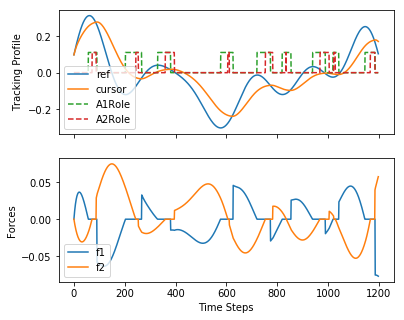

In [75]:
agent1, agent2 = agent1_fp11, agent2_fp11
t_ts, rx_ts, forces_ts, qvals_ts, rewards = benchmark_agents.policy_ts(env, agent1, agent2) 

role1 = narr(qvals_ts[1])-narr(qvals_ts[0]) >0
role2 = narr(qvals_ts[3])-narr(qvals_ts[2]) >0

print('Env Reward = ', rewards[2], ' Agent1 Mean Utility = ', rewards[3], ' Agent2 Mean Utility = ', rewards[4])
fig,ax = plt.subplots(2, figsize=(6,5), sharex=True)
ax[0].plot(t_ts, rx_ts[0], label='ref'); 
ax[0].plot(t_ts, rx_ts[1], label='cursor')
ax[0].plot(t_ts, role1*np.mean(abs(narr(rx_ts[0]))),ls='--', label='A1Role');
ax[0].plot(t_ts, role2*np.mean(abs(narr(rx_ts[0]))),ls='--', label='A2Role');
ax[0].set_ylabel('Tracking Profile'); ax[0].legend()
# print('r mean = ', np.mean(abs(env.traj[0])))

ax[1].plot(t_ts, forces_ts[0], label='f1'); 
ax[1].plot(t_ts, forces_ts[1], label='f2'); 
ax[1].set_ylabel('Forces'); ax[1].legend()

# ax[2].plot(t_ts, rewards[0], label='Agent1'); ax[2].plot(t_ts, rewards[1], label='Agent2'); 
# _=ax[2].set_ylabel('Utility'); ax[2].legend()
ax[-1].set_xlabel('Time Steps')
plt.savefig('dqn_exp1example.pdf')

In [13]:
agent1s, agent2s = [],[]
x_fpxs, y_fpxs = [],[]


for i in range(1,6):
    filename = 'data/exp1.'+str(i)+'results.p'
    x_fpx, y_fpx, agent1_fpx, agent2_fpx = pickle.load( open( filename, "rb" ) )
    agent1s.append(agent1_fpx);agent2s.append(agent2_fpx)
    x_fpxs.append(x_fpx); y_fpxs.append(y_fpx)

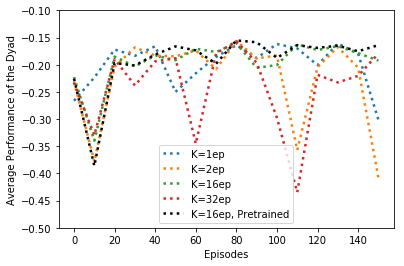

In [48]:
# fig, ax = plt.subplot
labels = ['K=1ep', 'K=2ep','K=16ep','K=32ep', 'K=16ep, Pretrained']
cma = cm.tab10#cm.gist_heat
colors= [cma(i) for i in range(4)]+[cm.binary(1.)]
# colors = [cma(3), cma(2), cm.tab20c(1), cm.tab20c(0), cm.tab20c(4)]
# colors = [cma(1./4), cma(2./4), cma(3./4), cma(4./4), cm.tab20c(4)]
linew = 2.5; linest = ':'#(0, (5, 2, 1, 2))



for i in range(5):
    plt.plot(x_fpxs[i], y_fpxs[i],label=labels[i] ,color=colors[i], ls=linest, lw=linew)
plt.legend()
plt.xlabel('Episodes');plt.ylabel('Average Performance of the Dyad')
plt.ylim(-.5, -0.1)
plt.savefig('dqn_exp1.pdf')

In [ ]:
# Constants that don't change across experiments. Be careful! lots of global vars.
# this import is run before each experiment, which serves the prupose of resetting 
# those parameters they've been changes.

from configs.fixed_exp_constants import * 

exp_name = 'exp2.1'
target_int = 16
c_effort = 0.5
# Pretraining 
# rl1.net.load_state_dict(torch.load('data/a1_rl_NetRelu1L1.pth'))
# rl2.net.load_state_dict(torch.load('data/a2_rl_NetRelu1L1.pth'))


hyperparams = BMHyperparams(batch_size, learning_rate, 
                buffer_max_size, experience_sift_tol, target_int)

agent1 = rl_agent.DQNAgent(rl1, pdcont1, buffer1, perspective=0, sigma=sigma, 
                 hyperparams=hyperparams, c_error=1., c_effort=c_effort,
                 force_rms=1.)
agent2 = rl_agent.DQNAgent(rl2, pdcont2, buffer2, perspective=1, sigma=sigma, 
                 hyperparams=hyperparams, c_error=1., c_effort=c_effort,
                 force_rms=1.)
rl1.set_agent(agent1); rl2.set_agent(agent2)

agent1.set_train_hyperparams(hyperparams)
agent2.set_train_hyperparams(hyperparams)

algo = train_agents.train_dyad
x_fpx, y_fpx, agent1_fpx, agent2_fpx = benchmark_agents.benchmark(algo, hyperparams, env, 
                                       agent1, agent2, xaxis_params)

pickle.dump((x_fpx, y_fpx, agent1_fpx, agent2_fpx), open( "data/"+exp_name+"results.p", "wb" ) )

In [ ]:
# Constants that don't change across experiments. Be careful! lots of global vars.
# this import is run before each experiment, which serves the prupose of resetting 
# those parameters they've been changes.

from configs.fixed_exp_constants import * 

exp_name = 'exp2.2'
target_int = 16
c_effort = 0.5
# Pretraining 
rl1.net.load_state_dict(torch.load('data/a1_rl_NetRelu1L1.pth'))
rl2.net.load_state_dict(torch.load('data/a2_rl_NetRelu1L1.pth'))


hyperparams = BMHyperparams(batch_size, learning_rate, 
                buffer_max_size, experience_sift_tol, target_int)

agent1 = rl_agent.DQNAgent(rl1, pdcont1, buffer1, perspective=0, sigma=sigma, 
                 hyperparams=hyperparams, c_error=1., c_effort=c_effort,
                 force_rms=1.)
agent2 = rl_agent.DQNAgent(rl2, pdcont2, buffer2, perspective=1, sigma=sigma, 
                 hyperparams=hyperparams, c_error=1., c_effort=c_effort,
                 force_rms=1.)
rl1.set_agent(agent1); rl2.set_agent(agent2)

agent1.set_train_hyperparams(hyperparams)
agent2.set_train_hyperparams(hyperparams)

algo = train_agents.train_dyad
x_fpx, y_fpx, agent1_fpx, agent2_fpx = benchmark_agents.benchmark(algo, hyperparams, env, 
                                       agent1, agent2, xaxis_params)

pickle.dump((x_fpx, y_fpx, agent1_fpx, agent2_fpx), open( "data/"+exp_name+"results.p", "wb" ) )

In [66]:
agent1s, agent2s = [],[]
x_fpxs, y_fpxs = [],[]


for i in range(1,4):
    filename = 'data/exp2.'+str(i)+'results.p'
    x_fpx, y_fpx, agent1_fpx, agent2_fpx = pickle.load( open( filename, "rb" ) )
    agent1s.append(agent1_fpx);agent2s.append(agent2_fpx)
    x_fpxs.append(x_fpx); y_fpxs.append(y_fpx)

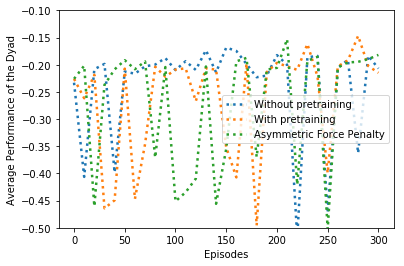

In [68]:
# fig, ax = plt.subplot
labels = ['Without pretraining', 'With pretraining', 'Asymmetric Force Penalty']
cma = cm.tab10#cm.gist_heat
colors= [cma(i) for i in range(3)]#+[cm.binary(1.)]
# colors = [cma(3), cma(2), cm.tab20c(1), cm.tab20c(0), cm.tab20c(4)]
# colors = [cma(1./4), cma(2./4), cma(3./4), cma(4./4), cm.tab20c(4)]
linew = 2.5; linest = ':'#(0, (5, 2, 1, 2))



for i in range(3):
    plt.plot(x_fpxs[i], y_fpxs[i],label=labels[i] ,color=colors[i], ls=linest, lw=linew)
plt.legend()
plt.xlabel('Episodes');plt.ylabel('Average Performance of the Dyad')
plt.ylim(-.5, -0.1)
plt.savefig('dqn_exp2.pdf')

Env Reward =  -0.175302037966077  Agent1 Mean Utility =  -0.5332943810939138  Agent2 Mean Utility =  -0.5315501491722648


Text(0.5, 0, 'Time Steps')

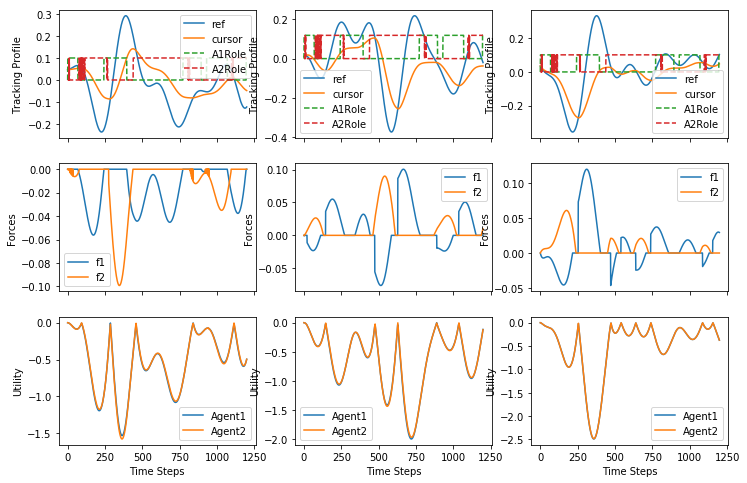

In [76]:
from configs.fixed_exp_constants import * 

agent1, agent2 = agent1s[0], agent2s[0]
t_ts, rx_ts, forces_ts, qvals_ts, rewards = benchmark_agents.policy_ts(env, agent1, agent2) 

role1 = narr(qvals_ts[1])-narr(qvals_ts[0]) >0
role2 = narr(qvals_ts[3])-narr(qvals_ts[2]) >0

print('Env Reward = ', rewards[2], ' Agent1 Mean Utility = ', rewards[3], ' Agent2 Mean Utility = ', rewards[4])
fig,ax_ = plt.subplots(3,3, figsize=(12,8), sharex=True)
ax = ax_[:,0]
ax[0].plot(t_ts, rx_ts[0], label='ref'); 
ax[0].plot(t_ts, rx_ts[1], label='cursor')
ax[0].plot(t_ts, role1*np.mean(abs(narr(rx_ts[0]))),ls='--', label='A1Role');
ax[0].plot(t_ts, role2*np.mean(abs(narr(rx_ts[0]))),ls='--', label='A2Role');
ax[0].set_ylabel('Tracking Profile'); ax[0].legend()
# print('r mean = ', np.mean(abs(env.traj[0])))

ax[1].plot(t_ts, forces_ts[0], label='f1'); 
ax[1].plot(t_ts, forces_ts[1], label='f2'); 
ax[1].set_ylabel('Forces'); ax[1].legend()

ax[2].plot(t_ts, rewards[0], label='Agent1'); ax[2].plot(t_ts, rewards[1], label='Agent2'); 
_=ax[2].set_ylabel('Utility'); ax[2].legend()
ax[-1].set_xlabel('Time Steps')

ax = ax_[:,1]
agent1, agent2 = agent1s[1], agent2s[1]
t_ts, rx_ts, forces_ts, qvals_ts, rewards = benchmark_agents.policy_ts(env, agent1, agent2) 
ax[0].plot(t_ts, rx_ts[0], label='ref'); 
ax[0].plot(t_ts, rx_ts[1], label='cursor')
ax[0].plot(t_ts, role1*np.mean(abs(narr(rx_ts[0]))),ls='--', label='A1Role');
ax[0].plot(t_ts, role2*np.mean(abs(narr(rx_ts[0]))),ls='--', label='A2Role');
ax[0].set_ylabel('Tracking Profile'); ax[0].legend()
# print('r mean = ', np.mean(abs(env.traj[0])))

ax[1].plot(t_ts, forces_ts[0], label='f1'); 
ax[1].plot(t_ts, forces_ts[1], label='f2'); 
ax[1].set_ylabel('Forces'); ax[1].legend()

ax[2].plot(t_ts, rewards[0], label='Agent1'); ax[2].plot(t_ts, rewards[1], label='Agent2'); 
_=ax[2].set_ylabel('Utility'); ax[2].legend()
ax[-1].set_xlabel('Time Steps')

ax = ax_[:,2]
agent1, agent2 = agent1s[2], agent2s[2]
t_ts, rx_ts, forces_ts, qvals_ts, rewards = benchmark_agents.policy_ts(env, agent1, agent2) 
ax[0].plot(t_ts, rx_ts[0], label='ref'); 
ax[0].plot(t_ts, rx_ts[1], label='cursor')
ax[0].plot(t_ts, role1*np.mean(abs(narr(rx_ts[0]))),ls='--', label='A1Role');
ax[0].plot(t_ts, role2*np.mean(abs(narr(rx_ts[0]))),ls='--', label='A2Role');
ax[0].set_ylabel('Tracking Profile'); ax[0].legend()
# print('r mean = ', np.mean(abs(env.traj[0])))

ax[1].plot(t_ts, forces_ts[0], label='f1'); 
ax[1].plot(t_ts, forces_ts[1], label='f2'); 
ax[1].set_ylabel('Forces'); ax[1].legend()

ax[2].plot(t_ts, rewards[0], label='Agent1'); ax[2].plot(t_ts, rewards[1], label='Agent2'); 
_=ax[2].set_ylabel('Utility'); ax[2].legend()
ax[-1].set_xlabel('Time Steps')